In [1]:
import os
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt             
import cv2
import sys
sys.path.append("..")
from main_classes.DataRetriever import load_npz

In [2]:
img_test_names = [
    '-4719437476303869711.png',
    '-6501158899129892049.png',
    '90209233670953446.png',
    '7807990383289431783.png',
    '4450708653156932785.png',
    '4761839991216628460.png',
    '8744424007737924017.png',
    '-5241999479479245788.png',
    '1420610121287749672.png',
    '1677615307783466665.png',
    '-2248548818391080717.png',
    '-3571944990465662481.png'
]

In [3]:
IMGS_FOLDER = '../../../data/images/'
DIAGRAMS_FOLDER = '../../diagrams/'
SAVE_FOLDER = "../../results_plots/features_selection/"

In [4]:
cascade_img = cv2.imread(f"{DIAGRAMS_FOLDER}/cascade.jpg")

In [5]:
# Select img
i_img = 0
img_test = img_test_names[i_img]

#img_test = "cascade.jpg"

# White img
#img_test = "-3508905363612080142.png"
#black img
#img_test = "3765193443485149800.png"

In [6]:
def calculate_LC(img, kernel_size=40):
    LC_img = np.zeros(img.shape)
    mean_luminance = img.mean()
    for i in range(kernel_size//2, len(img)-kernel_size//2):
        for j in range(kernel_size//2, img.shape[-1]-kernel_size//2):
            mask = img[i-kernel_size//2:i+kernel_size//2,j-kernel_size//2:j+kernel_size//2]
            LC = mask.std()/mean_luminance
            LC_img[i, j] = LC
    return LC_img

In [7]:
from utils.process_helpers import img_to_power_spectrum

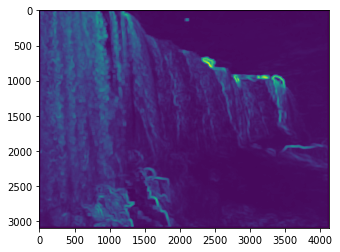

In [8]:
cascade_img = cv2.imread(f"{DIAGRAMS_FOLDER}/cascade.jpg", 0)
LC_img = calculate_LC(cascade_img, kernel_size=40)
plt.imshow(LC_img,) #cmap="Greys")
plt.show()

In [10]:
cascade_img = cv2.imread(f"{DIAGRAMS_FOLDER}/cascade.jpg", 0)

magnitude_spectrum = img_to_power_spectrum(cascade_img)
#phase_spectrum = np.angle(fshift)

In [11]:
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

def lin_reg(x, a, b):
    return a * x + b

spectrum1 = magnitude_spectrum[magnitude_spectrum.shape[0]//2:,  magnitude_spectrum.shape[1]//2]
spectrum2 = magnitude_spectrum[magnitude_spectrum.shape[0]//2, magnitude_spectrum.shape[1]//2:]

x1 = np.arange(1, len(spectrum1)+1)
popt_pl, pcov = curve_fit(power_law, x1, spectrum1)
X1 = np.log(x1)
popt_lr, pcov = curve_fit(lin_reg, X1, spectrum1)

In [60]:
import matplotlib

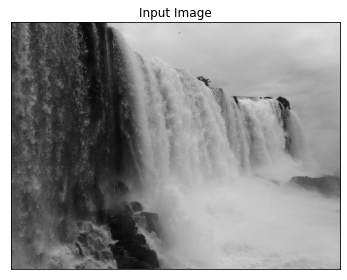

In [168]:
fig, ax = plt.subplots(1, )#figsize=(12, 2.7))

ax.imshow(cascade_img, cmap='gray')
ax.set_title('Input Image')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig(os.path.join(SAVE_FOLDER, "input.png"))
plt.show()

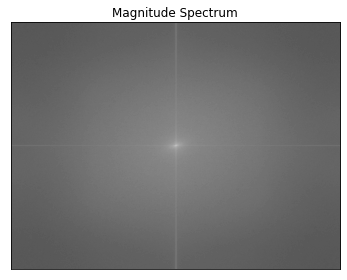

In [171]:
fig, ax = plt.subplots(1, )#figsize=(12, 2.7))

ax.imshow(magnitude_spectrum, cmap='gray')
ax.set_title('Magnitude Spectrum')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig(os.path.join(SAVE_FOLDER, "PS.png"))
plt.show()

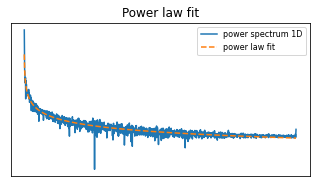

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.7))

ax.plot(x1, spectrum1, label="power spectrum 1D")
#ax4.plot(x1, power_law(x1, *popt_pl), '--', label=r'$\frac{a}{x^b}$ = $\frac{%5.2f}{x^{%5.2f}}$' % tuple(popt_pl))
ax.plot(x1, power_law(x1, *popt_pl), '--', label='power law fit')
ax.set_title('Power law fit')
ax.legend(prop={'size': 8})
ax.set_xticks([])
ax.set_yticks([])


#fig1.tight_layout()
fig.tight_layout()
fig.savefig(os.path.join(SAVE_FOLDER, "PS_pl.png"))
plt.show()

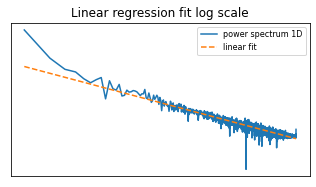

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.7))

ax.plot(X1, spectrum1, label="power spectrum 1D")
#ax5.plot(X1, lin_reg(X1, *popt_lr), '--', label='a*x+b = %5.3f*x+%5.3f' % tuple(popt_lr))
ax.plot(X1, lin_reg(X1, *popt_lr), '--', label='linear fit')
ax.legend(prop={'size': 8})
ax.set_title('Linear regression fit log scale')
ax.set_xticks([])
ax.set_yticks([])
#fig.suptitle('Fitted curves Power spectrum 1D', y=0.49)

#fig1.tight_layout()
fig.tight_layout()
fig.savefig(os.path.join(SAVE_FOLDER, "PS_lr.png"))
plt.show()

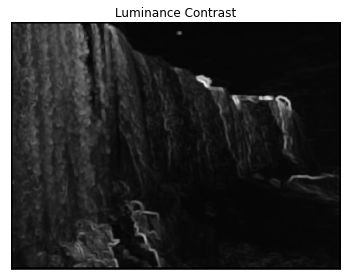

In [172]:
fig, ax = plt.subplots(1,)# figsize=(6, 2.7))

ax.imshow(LC_img, cmap='gray')
ax.set_title('Luminance Contrast')
ax.set_xticks([])
ax.set_yticks([])

#fig1.tight_layout()
fig.tight_layout()
fig.savefig(os.path.join(SAVE_FOLDER, "LC.png"))
plt.show()

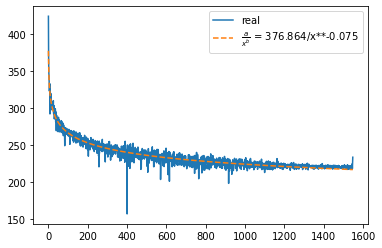

362670.95025921386

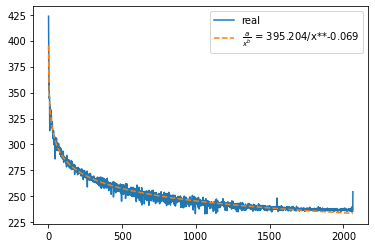

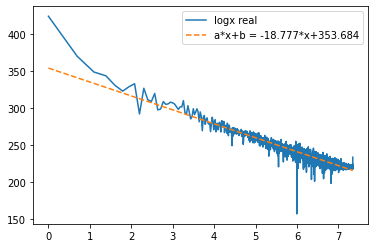

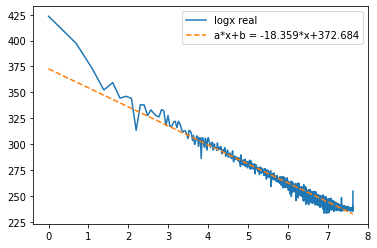

In [13]:
spectrum1 = magnitude_spectrum[magnitude_spectrum.shape[0]//2:,  magnitude_spectrum.shape[1]//2]
spectrum2 = magnitude_spectrum[magnitude_spectrum.shape[0]//2, magnitude_spectrum.shape[1]//2:]

x1 = np.arange(1, len(spectrum1)+1)
popt, pcov = curve_fit(power_law, x1, spectrum1)
plt.plot(x1, spectrum1, label="real")
plt.plot(x1, power_law(x1, *popt), '--', label=r'$\frac{a}{x^b}$ = %5.3f/x**%5.3f' % tuple(popt))
plt.legend()
plt.show()

display(np.trapz(spectrum1))

x2 = np.arange(1, len(spectrum2)+1)
popt, pcov = curve_fit(power_law, x2, spectrum2)
plt.plot(x2, spectrum2, label="real")
plt.plot(x2, power_law(x2, *popt), '--', label=r'$\frac{a}{x^b}$ = %5.3f/x**%5.3f' % tuple(popt))
plt.legend()
plt.show()

X1 = np.log(x1)
popt, pcov = curve_fit(lin_reg, X1, spectrum1)
plt.plot(X1, spectrum1, label="logx real")
plt.plot(X1, lin_reg(X1, *popt), '--', label='a*x+b = %5.3f*x+%5.3f' % tuple(popt))
plt.legend()
plt.show()

X2 = np.log(x2)
popt, pcov = curve_fit(lin_reg, X2, spectrum2)
plt.plot(X2, spectrum2, label="logx real")
plt.plot(X2, lin_reg(X2, *popt), '--', label='a*x+b = %5.3f*x+%5.3f' % tuple(popt))
plt.legend()
plt.show()



In [179]:
x_lim = (0, 1000)
Nt, SEQ, INuts, LR, EPOCHS, PAT = 1, 10, 30, 0.0001, 500, 15
RESULTS_FOLDER = "../../results/MCD/"

# Subjects
subject_train = "s605" #s605, s617, s620

# Params
for N in [1]:#, 5, 11, 20]:
    train_path = f"SUBJECT_{subject_train}-tIMG_natural-N_{N}-Nt_{Nt}-SEQ_{SEQ}-InUts_{INuts}-LR_{LR}-EPOCHS_{EPOCHS}-PAT_{PAT}"

    folder_path_themselves = os.path.join(RESULTS_FOLDER,
                              train_path)
    # Load results
    y_real, y_pred = load_npz(folder_path_themselves, 
                              "natural", 
                              get_mcdropout_results=False)
    y_real.reset_index(inplace=True, drop=True)
    y_pred.reset_index(inplace=True, drop=True)

===========> Loading npz data from natural images


In [180]:
"""
Perry, Jeffrey S., and Wilson S. Geisler. "Gaze-contingent real-time simulation of arbitrary visual fields." Human vision and electronic imaging VII. Vol. 4662. International Society for Optics and Photonics, 2002.
Jiang, Ming, et al. "Salicon: Saliency in context." Proceedings of the IEEE conference on computer vision and pattern recognition. 2015.
"""
def genGaussiankernel(width, sigma):
    x = np.arange(-int(width/2), int(width/2)+1, 1, dtype=np.float32)
    x2d, y2d = np.meshgrid(x, x)
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / np.sum(kernel_2d)
    return kernel_2d

def pyramid(im, sigma=1, prNum=6):
    height_ori, width_ori, ch = im.shape
    G = im.copy()
    pyramids = [G]
    # gaussian blur
    Gauss_kernel2D = genGaussiankernel(5, sigma)
    # downsample
    for i in range(1, prNum):
        G = cv2.filter2D(G, -1, Gauss_kernel2D)
        height, width, _ = G.shape
        G = cv2.resize(G, (int(width/2), int(height/2)))
        pyramids.append(G)
    # upsample
    for i in range(1, 6):
        curr_im = pyramids[i]
        for j in range(i):
            if j < i-1:
                im_size = (curr_im.shape[1]*2, curr_im.shape[0]*2)
            else:
                im_size = (width_ori, height_ori)
            curr_im = cv2.resize(curr_im, im_size)
            curr_im = cv2.filter2D(curr_im, -1, Gauss_kernel2D)
        pyramids[i] = curr_im
    return pyramids

def foveat_img(im, fixs):
    """
    im: input image
    fixs: sequences of fixations of form [(x1, y1), (x2, y2), ...]
    
    This function outputs the foveated image with given input image and fixations.
    """
    sigma = 0.248
    prNum = 6
    As = pyramid(im, sigma, prNum)
    height, width, _ = im.shape
    # compute coef
    p = 7.5
    k = 3
    alpha = 2.5
    x = np.arange(0, width, 1, dtype=np.float32)
    y = np.arange(0, height, 1, dtype=np.float32)
    x2d, y2d = np.meshgrid(x, y)
    theta = np.sqrt((x2d - fixs[0][0]) ** 2 + (y2d - fixs[0][1]) ** 2) / p
    for fix in fixs[1:]:
        theta = np.minimum(theta, np.sqrt((x2d - fix[0]) ** 2 + (y2d - fix[1]) ** 2) / p)
    R = alpha / (theta + alpha)
    Ts = []
    for i in range(1, prNum):
        Ts.append(np.exp(-((2 ** (i-3)) * R / sigma) ** 2 * k))
    Ts.append(np.zeros_like(theta))
    # omega
    omega = np.zeros(prNum)
    for i in range(1, prNum):
        omega[i-1] = np.sqrt(np.log(2)/k) / (2**(i-3)) * sigma
    omega[omega>1] = 1
    # layer index
    layer_ind = np.zeros_like(R)
    for i in range(1, prNum):
        ind = np.logical_and(R >= omega[i], R <= omega[i - 1])
        layer_ind[ind] = i
    # B
    Bs = []
    for i in range(1, prNum):
        Bs.append((0.5 - Ts[i]) / (Ts[i-1] - Ts[i] + 1e-5))
    # M
    Ms = np.zeros((prNum, R.shape[0], R.shape[1]))
    for i in range(prNum):
        ind = layer_ind == i
        if np.sum(ind) > 0:
            if i == 0:
                Ms[i][ind] = 1
            else:
                Ms[i][ind] = 1 - Bs[i-1][ind]
        ind = layer_ind - 1 == i
        if np.sum(ind) > 0:
            Ms[i][ind] = Bs[i][ind]
    # generate periphery image
    im_fov = np.zeros_like(As[0], dtype=np.float32)
    for M, A in zip(Ms, As):
        for i in range(3):
            im_fov[:, :, i] += np.multiply(M, A[:, :, i])
    im_fov = im_fov.astype(np.uint8)
    return im_fov

In [181]:
img = cv2.imread(f"{IMGS_FOLDER}/{img_test}")
%time fov_img = foveat_img(img, [[400, 500]])
#plt.imshow(fov_img)

CPU times: user 401 ms, sys: 58.4 ms, total: 459 ms
Wall time: 251 ms


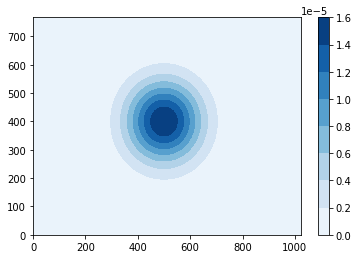

In [182]:
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
sigma_x = 100
sigma_y = 100
mu_x = 500
mu_y = 400
z = 1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x - mu_x)**2/(2*sigma_x**2)+(y-mu_y)**2/(2*sigma_y**2)))

plt.contourf(x, y, z, cmap='Blues')
plt.colorbar()
plt.show()

In [183]:
dst = cv2.filter2D(img, -1, kernel=z)

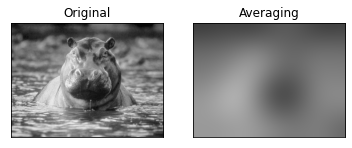

In [184]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [185]:
%load_ext autoreload
%autoreload 2

In [186]:
import tensorflow as tf

In [187]:
from SALICONtf import SALICONtf
salicon_weights = "../../checkpoints/SALICON/model_lr0.01_loss_crossentropy.h5"
vgg16_weights = "../../checkpoints/SALICON/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
s = SALICONtf(salicon_weights=salicon_weights, vgg16_weights=vgg16_weights)

2022-01-27 15:32:14.557587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 15:32:14.620743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 15:32:14.622208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 15:32:14.624985: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_coarse (InputLayer)       [(None, 300, 400, 3) 0                                            
__________________________________________________________________________________________________
Input_fine (InputLayer)         [(None, 600, 800, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1_coarse (Conv2D)    (None, 300, 400, 64) 1792        Input_coarse[0][0]               
__________________________________________________________________________________________________
block1_conv1_fine (Conv2D)      (None, 600, 800, 64) 1792        Input_fine[0][0]                 
____________________________________________________________________________________________

In [188]:
img_test_names[i_img]

'-4719437476303869711.png'

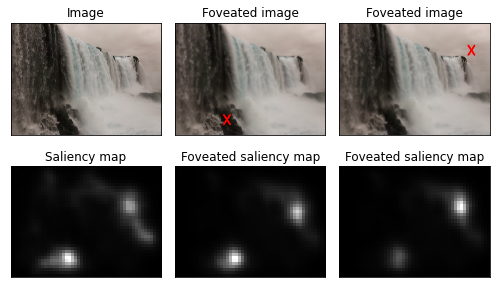

In [237]:
fixations = [
    [1300, 2800],
    [3500, 900],
]

img = cv2.imread(f"{DIAGRAMS_FOLDER}/cascade.jpg")#[...,::-1]
smap = s.compute_saliency(img=img)

fig, ax = plt.subplots(2, len(fixations)+1, figsize=(7,4.2))

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Image')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[1, 0].imshow(smap, cmap='gray')
ax[1, 0].set_title('Saliency map')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

for i, fixation in enumerate(fixations):
    fov_img = foveat_img(img, [fixation])
    smap_fov = s.compute_saliency(img=fov_img)
    cv2.putText(fov_img,'X', fixation, cv2.FONT_HERSHEY_SIMPLEX, 12, (255, 0, 0), 50, cv2.LINE_AA)
    ax[0, i+1].imshow(fov_img, cmap='gray')
    ax[0, i+1].set_title('Foveated image')
    ax[0, i+1].set_xticks([])
    ax[0, i+1].set_yticks([])
    ax[1, i+1].imshow(smap_fov, cmap='gray')
    ax[1, i+1].set_title('Foveated saliency map')
    ax[1, i+1].set_xticks([])
    ax[1, i+1].set_yticks([])
fig.tight_layout()
fig.savefig(os.path.join(SAVE_FOLDER, "foveated_saliency.png"))
plt.show()

In [ ]:
#cv2.putText(fov_img,'X', fixation, cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 255), 20, cv2.LINE_AA)
#cv2.imwrite("fov_img.png", fov_img)
#cv2.imwrite("smap_fov.png", smap_fov*255)
"""
IMG_SIZE = (224, 224)
img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_CUBIC)
fov_img = cv2.resize(fov_img, IMG_SIZE, interpolation=cv2.INTER_CUBIC)
smap = cv2.resize(smap, IMG_SIZE, interpolation=cv2.INTER_CUBIC)
smap_fov = cv2.resize(smap_fov, IMG_SIZE, interpolation=cv2.INTER_CUBIC)
"""

In [190]:
smap_fov.shape

(37, 50)

In [191]:
def create_mobile_net_v2_model(input_shape=(224, 224, 3)):
    
    pretrained_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False,
                                                   weights='imagenet')
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(3, (1, 1)),
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D()
    ])
    model.trainable = False
    model.build((None, 224, 224, 1))
    return model

In [192]:
#np.prod(s.output.shape[1:])

In [193]:
#pretrained_model = create_mobile_net_v2_model()

In [194]:
#pretrained_model.output